# Module 1: Exercise A

In this project, we will focus on exploratory data analysis of liver cirrhosis. Let's first load all libraries or packages needed:

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## About the Data

In this dataset, the target variable is __Stage__, which represents the histologic stage of the disease and can take on values of 1, 2, 3, or 4.

Cirrhosis is a late-stage liver condition characterized by fibrosis (scarring), resulting from various liver diseases and conditions, such as hepatitis and chronic alcoholism. The data set includes information gathered from a trial on primary biliary cirrhosis (PBC) conducted at the Mayo Clinic between 1974 and 1984.

>__Task 1__
>
>Import the data file "cirrhosis_predict.csv" and check metadata using `info()`

In [2]:
cirr = pd.read_csv("cirrhosis_predict.csv")

>__Task 2__
>
>Check the top 10 rows of the data

In [3]:
print(cirr.head(10))

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   
5   6    2503      D          Placebo  24201   F       N            Y       N   
6   7    1832      C          Placebo  20284   F       N            Y       N   
7   8    2466      D          Placebo  19379   F       N            N       N   
8   9    2400      D  D-penicillamine  15526   F       N            N       Y   
9  10      51      D          Placebo  25772   F       Y            N       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.

## Data Cleansing

>__Task 3__
>
>Check if there is any duplicates in the `ID` column and identify if further action is needed

In [4]:
duplicate_ids = cirr["ID"].duplicated()
print(duplicate_ids.any())
#No duplicate IDs found

False


The __ID__ column usually is not needed in machine learning models. __Status__ indicates the status of censored or death and is not required either. Let's drop these two columns.

>__Task 4__
>
>Drop __ID__ and __Status__ and check the result by printing the first 5 rows of the data

In [5]:
cirr = cirr.drop(columns=["ID", "Status"])
print(cirr.head())

   N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0     400  D-penicillamine  21464   F       Y            Y       Y     Y   
1    4500  D-penicillamine  20617   F       N            Y       Y     N   
2    1012  D-penicillamine  25594   M       N            N       N     S   
3    1925  D-penicillamine  19994   F       N            Y       Y     S   
4    1504          Placebo  13918   F       N            Y       Y     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  Stage  
0      190.0         12.2    4.0 

Now, we want to find out if there's any missing values in the data.

>__Task 5__
>
>- Find the number of missing values in each column
>- Retrieve rows with missing values

In [6]:
print(cirr.isnull().sum())
print(cirr[cirr.isnull().any(axis=1)])

missing_data = cirr[cirr.isnull().any(axis=1)]

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64
     N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
5      2503          Placebo  24201   F       N            Y       N     N   
13     1217          Placebo  20535   M       Y            Y       N     Y   
39     4467  D-penicillamine  17046   F       N            N       N     N   
40     1350  D-penicillamine  12285   F       N            Y       N     N   
41     4453          Placebo  12307   F       N            Y       Y     N   
..      ...              ...    ...  ..     ...          ...     ...   ...   
413     681              NaN  24472   F     NaN          NaN   

It looks like several columns have missing values, and some rows have multiple missing values. Let's first deal with missing values in the __Drug__ column. What is your suggestion?

>__Task 6__
>
>- Drop missing values in __Drug__ as they are hard to infer and filling the missing values can lead to biased data
>- Drop rows with >=3 missing values

In [7]:
cirr = cirr.dropna(subset=["Drug"])
cirr = cirr[cirr.isnull().sum(axis=1) < 3]

>__Task 7__
>
>- Check again the number of missing values in each column
>- Fill missing values with mean (for numerical columns) or majority class (for string/categorical columns)
>- Retrieve rows with missing values again

In [8]:
print(cirr.isnull().sum())
numerical_columns = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper", "Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
categorical_columns = ["Drug","Sex","Edema","Ascites","Hepatomegaly","Spiders"]
for col in numerical_columns:
    mean_val = cirr[col].mean()
    cirr[col].fillna(mean_val, inplace=True)
for col in categorical_columns:
    mode_val = cirr[col].mode()
    if not mode_val.empty:
        cirr[col].fillna(mode_val[0], inplace=True)
print(cirr.isnull().sum())
print(cirr[cirr.isnull().any(axis=1)])
#No rows with missing values found after filling

N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Empty DataFrame
Columns: [N_Days, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


C:\Users\socce\AppData\Local\Temp\ipykernel_23740\157725971.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cirr[col].fillna(mean_val, inplace=True)
C:\Users\socce\AppData\Local\Temp\ipykernel_23740\157725971.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

If you've done it properly, you should get 0 rows when retrieving missing values in rows.

## Data Analysis and Preprocessing

Let's explore the data more. We will dive into a few attributes.

>__Task 8__
>
>- Check the min, max, and average values of the __Age__ column
>- Convert the column in days and repeat the value check (Note: Age unit can be divided by 365.)

In [9]:
print(cirr.Age.min())
print(cirr.Age.max())
print(cirr.Age.mean())

cirr.Age = cirr.Age/365

print(cirr.Age.min())
print(cirr.Age.max())
print(cirr.Age.mean())

9598
28650
18269.44230769231
26.295890410958904
78.4931506849315
50.05326659641728


>__Task 9__
>
>Find out how many data points are in each __Sex__ category

In [10]:
print(cirr.Sex.value_counts())

Sex
F    276
M     36
Name: count, dtype: int64


The __Drug__ column has categorical variables. Are they binary or multi-classes? Are they ordinal or nominal?

>__Task 10__
>
>- Check values and counts in the __Drug__ column
>- Convert variables into numerical ones and save the result to the column

In [11]:
print(cirr.Drug.value_counts())
#nominal, multi-class but only two classes present
cirr.Drug = (cirr.Drug == "Placebo").astype(int)
#1 == placebo, 0 == drug
print(cirr.Drug.value_counts())

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64
Drug
0    158
1    154
Name: count, dtype: int64


Let's continue with other categorical columns: __Sex__, __Ascites__, __Hepatomegaly__, __Spiders__, __Edema__. Note that these are binary columns, and you do not need to expand every value into column to fully convert it.

>__Task 11__
>
>- Check values and counts in columns: __Sex__, __Ascites__, __Hepatomegaly__, __Spiders__, __Edema__
>- Convert variables into numerical ones (Hint: use `get_dummies` to support dropping the first category in each feature)
>- Drop the original columns
>- Print the first 5 rows to check the result
>
>Note: You may want to consider adding prefix to the values when converting them, e.g., "Ascites_Y" instead of "Y", to avoid confusion of category columns.

In [12]:
cols = ["Sex", "Edema", "Ascites", "Hepatomegaly", "Spiders"]
dummies = pd.get_dummies(cirr[cols], prefix=cols, drop_first=True)

cirr = pd.concat([cirr, dummies], axis=1)
cirr.drop(columns=cols, inplace=True)
print(cirr.head())

   N_Days  Drug        Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0     400     0  58.805479       14.5        261.0     2.60   156.0    1718.0   
1    4500     0  56.484932        1.1        302.0     4.14    54.0    7394.8   
2    1012     0  70.120548        1.4        176.0     3.48   210.0     516.0   
3    1925     0  54.778082        1.8        244.0     2.54    64.0    6121.8   
4    1504     1  38.131507        3.4        279.0     3.53   143.0     671.0   

     SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Sex_M  Edema_S  \
0  137.95          172.0      190.0         12.2    4.0  False    False   
1  113.52           88.0      221.0         10.6    3.0  False    False   
2   96.10           55.0      151.0         12.0    4.0   True     True   
3   60.63           92.0      183.0         10.3    4.0  False     True   
4  113.15           72.0      136.0         10.9    3.0  False    False   

   Edema_Y  Ascites_Y  Hepatomegaly_Y  Spiders_Y  
0     True 

### Outliers

>__Task 12__
>
>- Check the min and max values of __SGOT__
>- Identify the rows with min and max values of the column

In [13]:
print(cirr.SGOT.max())
print(cirr.SGOT.min())

print(cirr[cirr.SGOT == cirr.SGOT.max()])
print(cirr[cirr.SGOT == cirr.SGOT.min()])
#Row 165 and 181 hold the max and min values respectively


457.25
26.35
     N_Days  Drug        Age  Bilirubin  Cholesterol  Albumin  Copper  \
165    2721     1  41.383562        5.7       1480.0     3.26    84.0   

     Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Sex_M  \
165    1960.0  457.25          108.0      213.0          9.5    2.0  False   

     Edema_S  Edema_Y  Ascites_Y  Hepatomegaly_Y  Spiders_Y  
165    False    False      False            True      False  
     N_Days  Drug        Age  Bilirubin  Cholesterol  Albumin  Copper  \
181    2555     0  56.983562        0.6   369.510563     3.69   161.0   

     Alk_Phos   SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Sex_M  \
181     674.0  26.35     124.702128      539.0          9.9    2.0  False   

     Edema_S  Edema_Y  Ascites_Y  Hepatomegaly_Y  Spiders_Y  
181    False    False      False            True      False  


>__Task 13__
>
>Retrieve rows where values are outliers in the __Cholesterol__ column
>
>- Find the the min, max, mean, and standard deviation of the column
>- Create a mask for values less than `mean-3*sd` and greater than `mean+3*sd`
>- Use the mask to filter the rows
>
>Do you recommend to replace the outliers?

In [14]:
#Should not replace. Outliers in this case are likely still valid clinical data points.
mean = cirr.Cholesterol.mean()
std_dev = cirr.Cholesterol.std()
mask = cirr.Cholesterol.between(mean-3*std_dev, mean+3*std_dev)
filtered = cirr[mask]
print(len(cirr), len(filtered))

312 304


As the dataset contains medical examination results, it is expected to see some outliers. Unless the number exceeds the possibility of the examination, there's no need to drop or replace the outliers.

### Train/Test Split

>__Task 14__
>
>Split the data into `X_train`, `X_test`, `y_train`, `y_test` 
>
>- The target variable is __Stage__, and the remaining columns are features
>- Set a 80(train):20(test) ratio
>- Set 123 randomness and shuffle the data

In [15]:
from sklearn.model_selection import train_test_split
features = [col for col in cirr.columns if col != 'Stage']
target = 'Stage'
X_train, X_test, y_train, y_test = train_test_split(cirr[features], cirr[target], train_size=0.8, random_state=123)

### Feature Scaling

>__Task 15__
>
>- Fit `MinMaxScaler` to scale all `X` columns between 0 and 1. Do you need to scale the encoded categorical variables?
>- Implement the scaler to both train and test sets from the above task, and save to `X_train_scaled` and `X_test_scaled`

In [16]:
#Encoded categorical variables do not need to be scaled since they are already between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

## Visualization

>__Task 16__
>
>Plot distributions for __Tryglicerides__ and __Platelets__ separately
>
>- Use pandas default histogram method
>- Set `bins` to 30 and transparency to 60%

<Axes: ylabel='Frequency'>

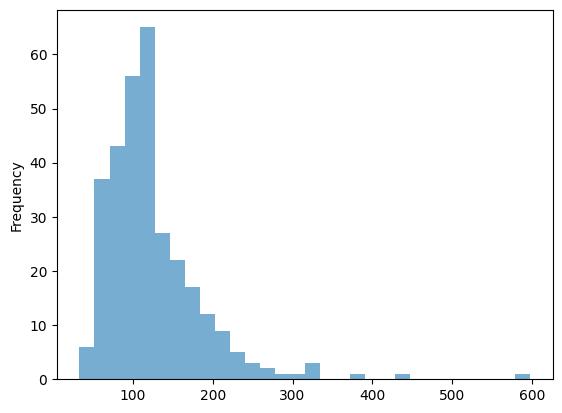

In [17]:
cirr.Tryglicerides.plot.hist(bins=30, alpha=0.6)

<Axes: ylabel='Frequency'>

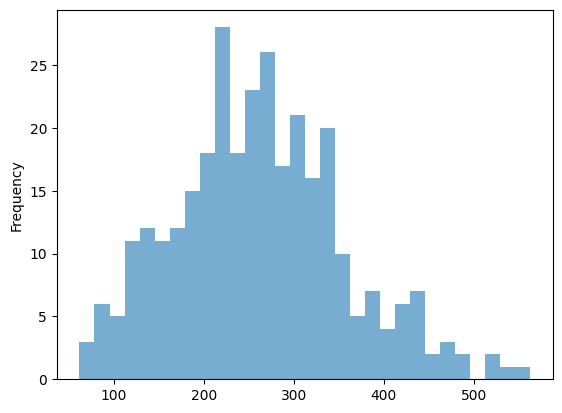

In [18]:
cirr.Platelets.plot.hist(bins=30, alpha=0.6)

>__Task 17__
>
>Create a scatter plot to show the join distribution of __Age__ and __Stage__, using pandas built-in method

<Axes: title={'center': 'Stage vs Age'}, xlabel='Age', ylabel='Stage'>

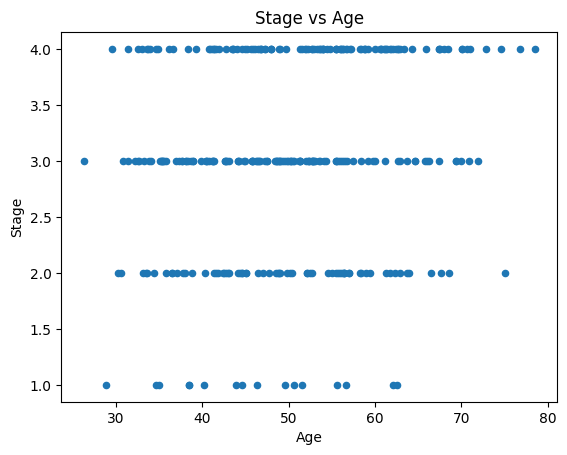

In [19]:
cirr.plot.scatter(x='Age', y='Stage', title='Stage vs Age')

>__Task 18__
>
>Create a scatter plot to show the join distribution of __Age__ and __Cholesterol__ by __Stage__ (hint: `hue` parameter), using seaborn method 

<Axes: xlabel='Age', ylabel='Cholesterol'>

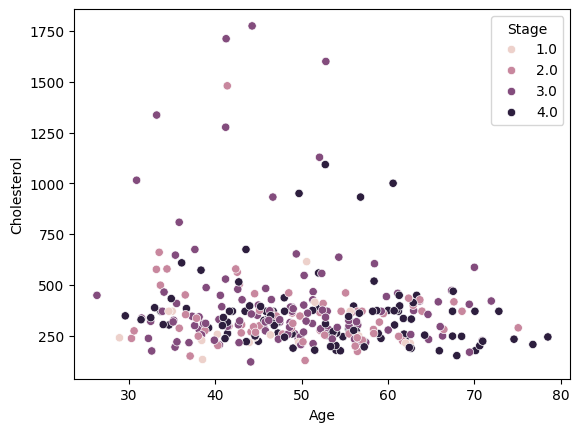

In [20]:
sns.scatterplot(data=cirr, x='Age', y='Cholesterol', hue='Stage')

>__Task 19__
>
>Create a pairplot using seaborn to compare features: __Bilirubin__, __Cholesterol__, __Albumin__, __Copper__

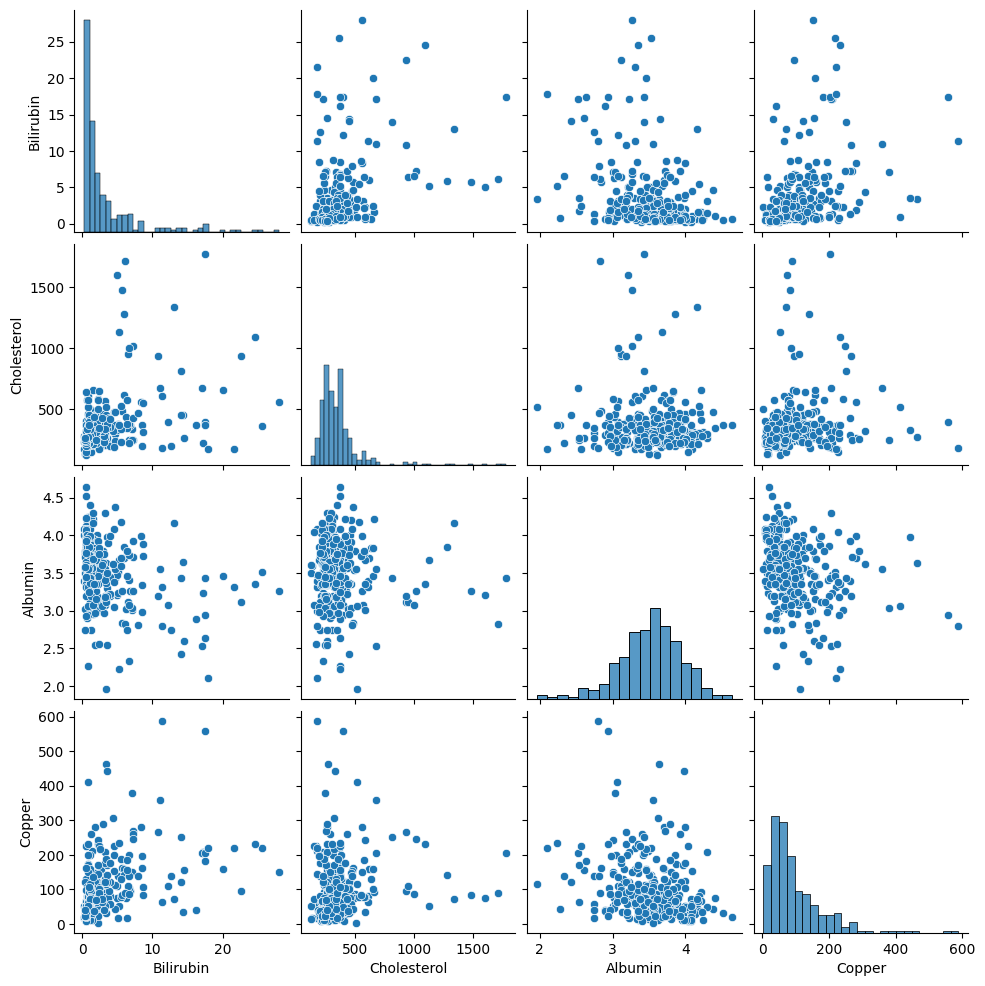

In [21]:
features = ["Bilirubin","Cholesterol","Albumin","Copper"]
sns.pairplot(cirr[features])